In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\Machine Learning A-Z\\Part 3 - Classification\\Section 15 - K-Nearest Neighbors (K-NN)\\Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X = data.iloc[:, 2:4]
y = data.iloc[:, 4]

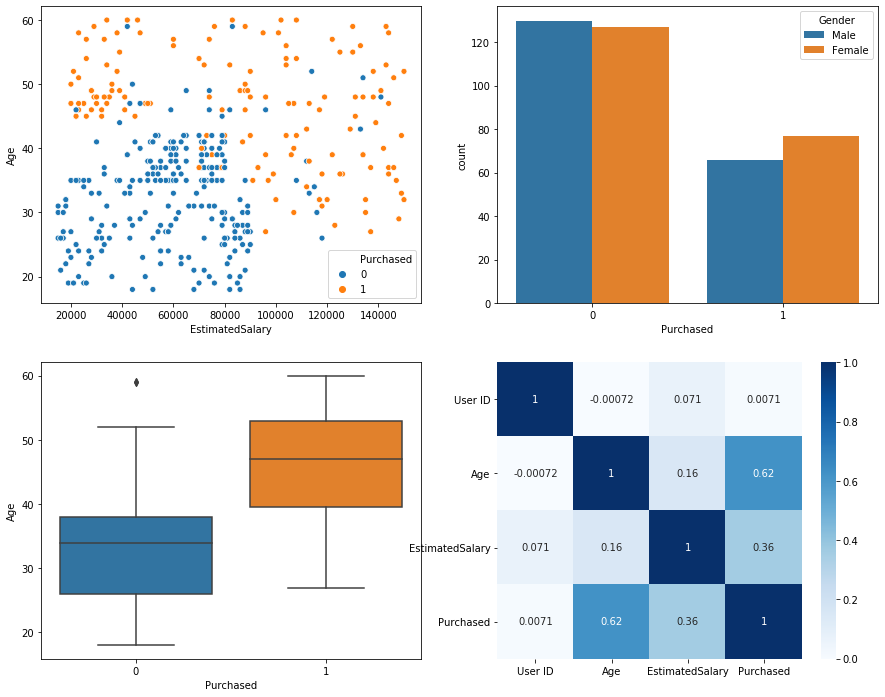

In [78]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='EstimatedSalary', y='Age',data=data,hue= 'Purchased')

plt.subplot(2,2,2)
sns.countplot(x='Purchased', hue='Gender',data=data)

plt.subplot(2,2,3)
sns.boxplot(x='Purchased', y='Age',data=data)

plt.subplot(2,2,4)
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [16]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.57095752, 0.42904248])

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,C=5)
classifier.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
y_pred = classifier.predict(X_test)

# Metric

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.95

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.95      0.88      0.91        24

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



In [70]:
cm=confusion_matrix(y_pred, y_test)

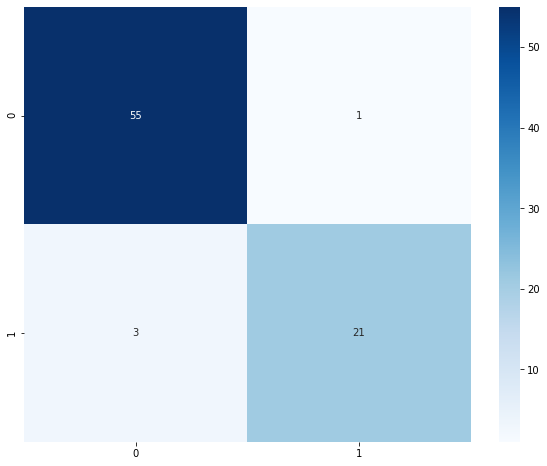

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')

# Model Selection

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,5,8, 10],'kernel':['linear']},
              {'C':[1,5,8, 10],'kernel':['rbf']}]

grid_search = GridSearchCV(classifier, parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid = grid_search.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
grid.best_score_

0.903125

In [66]:
grid.best_params_

{'C': 5, 'kernel': 'rbf'}

In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

array([0.84848485, 0.875     , 0.90625   , 0.8125    , 0.90625   ,
       0.90625   , 0.875     , 0.9375    , 1.        , 0.96774194])

In [68]:
accuracies.mean()

0.903497678396872

In [69]:
accuracies.std()

0.05248821831330389